In [1]:
# CIFAR-10, 32x32 colored images of 10 different obj., Airplane, car, etc


In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [23]:
from tensorflow.keras.datasets import cifar10

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

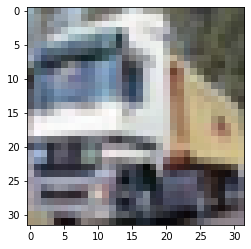

In [25]:
plt.imshow(x_train[1])

In [26]:
x_train[1].shape

(32, 32, 3)

In [27]:
# width, hieght, 3 color channels, RGB

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
x_train.max()

255

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [32]:
from tensorflow.keras.utils import to_categorical

In [36]:
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [37]:
y_test_categorical[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [38]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [40]:
# 0 airplane										
# 1 automobile										
# 2 bird										
# 3 cat										
# 4 deer										
# 5 dog										
# 6 frog										
# 7 horse										
# 8 ship										
# 9 truck										

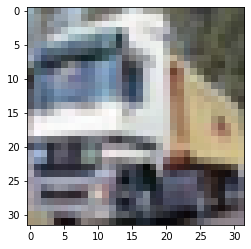

In [42]:
plt.imshow(x_train[1])

In [44]:
y_train[1]

array([9], dtype=uint8)

In [47]:
# 9 is truck

In [49]:
32*32*3
# add more convolutional and pooling layers since there is immense data

3072

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten

In [52]:
model = Sequential()

# Conv Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

# Pooling
model.add(MaxPool2D(pool_size=(2,2)))

# Conv Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))

# Pooling
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total para

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [58]:
model.fit(x_train, y_train_categorical, epochs=15, validation_data=(x_test, y_test_categorical), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
50000/50000 [==============================] - 48s 968us/sample - loss: 1.5271 - acc: 0.4458 - val_loss: 1.3330 - val_acc: 0.5232
Epoch 2/15
50000/50000 [==============================] - 37s 737us/sample - loss: 1.2033 - acc: 0.5733 - val_loss: 1.1435 - val_acc: 0.5973
Epoch 3/15
50000/50000 [==============================] - 37s 742us/sample - loss: 1.0565 - acc: 0.6288 - val_loss: 1.0601 - val_acc: 0.6251
Epoch 4/15
50000/50000 [==============================] - 38s 755us/sample - loss: 0.9540 - acc: 0.6651 - val_loss: 1.1052 - val_acc: 0.6149
Epoch 5/15
50000/50000 [==============================] - 40s 791us/sample - loss: 0.8706 - acc: 0.6945 - val_loss: 1.0037 - val_acc: 0.6577
Epoch 6/15
50000/50000 [==============================] - 39s 780us/sample - loss: 0.7980 - acc: 0.7230 - val_loss: 0.9789 - val_acc: 0.6709
Epoch 7/15
50000/50000 [==============================] 

In [65]:
metrics = pd.DataFrame(model.history.history)

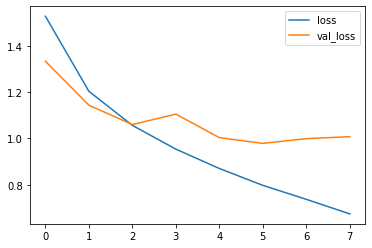

In [66]:
metrics[['loss', 'val_loss']].plot()

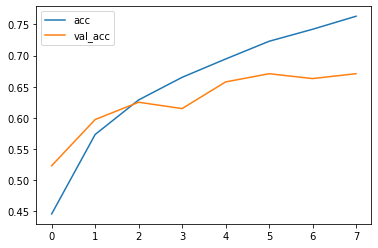

In [69]:
metrics[['acc', 'val_acc']].plot()

In [70]:
model.evaluate(x_test, y_test_categorical)

10000/10000 [==============================] - 3s 265us/sample - loss: 1.0077 - acc: 0.6709


[1.0077396556854248, 0.6709]

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
predictions = model.predict_classes(x_test)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      1000
           1       0.78      0.79      0.78      1000
           2       0.53      0.57      0.55      1000
           3       0.52      0.44      0.48      1000
           4       0.60      0.65      0.62      1000
           5       0.58      0.58      0.58      1000
           6       0.77      0.77      0.77      1000
           7       0.75      0.70      0.72      1000
           8       0.74      0.76      0.75      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [74]:
print(confusion_matrix(y_test, predictions))

[[673  24  86  16  22   9  11   9 101  49]
 [ 21 794  12  13   2   5  10   6  43  94]
 [ 55  11 569  46 112  94  56  25  19  13]
 [ 20  25  86 438  93 176  76  35  23  28]
 [ 25   8  96  43 651  36  40  76  17   8]
 [ 13   8  82 154  63 585  24  46  10  15]
 [  6  13  49  43  68  16 774  13   4  14]
 [ 15  13  49  49  70  71   8 697   4  24]
 [ 86  43  35  14   3  15   0   8 760  36]
 [ 32  85  19  19   2   6   9  14  46 768]]


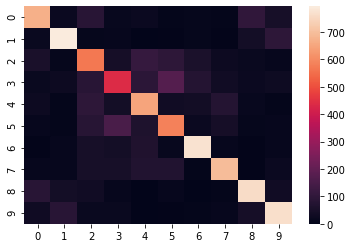

In [75]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions))

In [76]:
# 0 airplane										
# 1 automobile										
# 2 bird										
# 3 cat										
# 4 deer										
# 5 dog										
# 6 frog										
# 7 horse										
# 8 ship										
# 9 truck										

In [77]:
# Confusion between 3 and 5 = cat and dog

In [78]:
# Confusion between 9 and 1 = truck and automobile

In [83]:
one = x_test[12]

In [85]:
one.shape

(32, 32, 3)

In [86]:
model.predict_classes(one.reshape(1, 32, 32, 3))

array([5], dtype=int64)

In [88]:
y_test[12]

array([5])

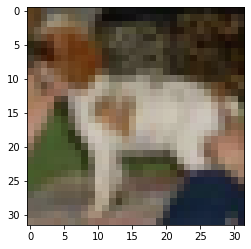

In [90]:
plt.imshow(one)

In [91]:
# Dog - 5th

In [92]:
model.save('cifarcnn.h5')